# Transport Matrix OCIM

**Reading the mean First Passage Time `fp1.mat` from MATLAB and grid information from matlab structure `grid.mat`**

In [1]:
from scipy.io import loadmat
import numpy as np
fp1data = loadmat(
    'fp1.mat',  # as calculated from OCIM
    squeeze_me=True,   # turn Nx1 arrays into scalars/vectors
    struct_as_record=False  # map MATLAB structs to Python objects
)

outputdata = loadmat(
    'output.mat',  # as calculated from OCIM
    squeeze_me=True,   # turn Nx1 arrays into scalars/vectors
    struct_as_record=True  # map MATLAB structs to Python objects
)
print(fp1data.keys())
print(outputdata.keys())
fpt = np.array(list(fp1data['fp1'])) # fpt is a global matix of the mean first passage time from any grid location to the surface ocean
print("Shape fpt (first passage time):", fpt.shape)

OUTPUT = outputdata['output']
print('OUTPUT is a ', type(OUTPUT), ' object of size ', OUTPUT.size, ' and shape ', OUTPUT.shape)
print('OUTPUT has dtype ', OUTPUT.dtype)
M3d = np.array(OUTPUT['M3d'].tolist())
print('M3d is a ', type(M3d), ' object of size ', M3d.size, ' and shape ', M3d.shape)
grid = OUTPUT['grid'].tolist()
print('grid is a ', type(grid), 'object of size ', grid.size, ' and shape ', grid.shape, ' and dtype ', grid.dtype)
zt = grid['zt'].tolist()
print('zt is a ', type(zt), 'object of size ', zt.size, ' and shape ', zt.shape, ' and dtype ', zt.dtype)
zt = grid['zt'].tolist()
zw = grid['zw'].tolist()
xt = grid['xt'].tolist()
xu = grid['xu'].tolist()
xv = grid['xv'].tolist()
yt = grid['yt'].tolist()
yu = grid['yu'].tolist()
yv = grid['yv'].tolist()
dzw = grid['dzw'].tolist()

dict_keys(['__header__', '__version__', '__globals__', 'fp1'])
dict_keys(['__header__', '__version__', '__globals__', 'output'])
Shape fpt (first passage time): (91, 180, 24)
OUTPUT is a  <class 'numpy.ndarray'>  object of size  1  and shape  ()
OUTPUT has dtype  [('T', 'O'), ('tstar', 'O'), ('S', 'O'), ('sstar', 'O'), ('C14', 'O'), ('c14star', 'O'), ('ic14', 'O'), ('CFC11', 'O'), ('cfc11star', 'O'), ('Q', 'O'), ('Qstar', 'O'), ('QS', 'O'), ('QSstar', 'O'), ('x', 'O'), ('TR', 'O'), ('msk', 'O'), ('M3d', 'O'), ('grid', 'O'), ('MSKS', 'O'), ('AD', 'O'), ('advscheme', 'O'), ('fu', 'O'), ('hu', 'O'), ('hw', 'O')]
M3d is a  <class 'numpy.ndarray'>  object of size  393120  and shape  (91, 180, 24)
grid is a  <class 'numpy.ndarray'> object of size  1  and shape  ()  and dtype  [('zt', 'O'), ('zw', 'O'), ('dzt', 'O'), ('dzw', 'O'), ('xt', 'O'), ('yt', 'O'), ('xu', 'O'), ('yu', 'O'), ('xv', 'O'), ('yv', 'O'), ('dxt', 'O'), ('dyt', 'O'), ('dxu', 'O'), ('dyu', 'O'), ('dxv', 'O'), ('dyv', 'O'), ('

In [45]:
M3d.dtype

dtype('uint8')

**Simple Plotting Routine**

`O2d` is the number of oceaninc boxes in the grid at any geogtarphic site. A value 0 thus indicated land, and values > 0 indicate increasing depth.

uint8
Shape of zwo is  (25,) while that for zw is (24,)


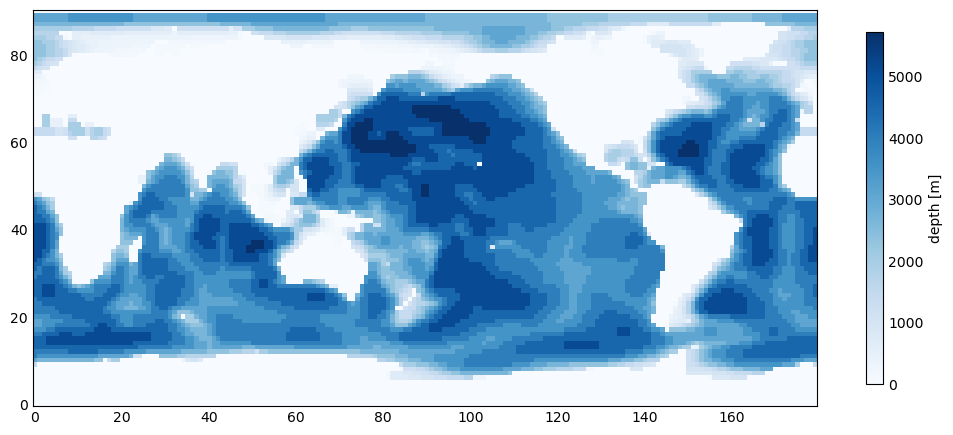

In [2]:
import matplotlib.pyplot as plt
import numpy as np


O2d = M3d.sum(axis=2).astype(np.uint8)
O2d.shape
h = O2d[45,:]
edges = np.insert(xu,0,0)

print(O2d.dtype)

zwo = np.append(zw,(zw[-1] + dzw[-1]))  # extends depth lebvels all the way to the bottom [0:24]
print('Shape of zwo is ', zwo.shape, 'while that for zw is', zw.shape)
Depth = zwo[O2d]

plt.style.use('_mpl-gallery-nogrid')

plt.figure(figsize=(10, 6))
plt.imshow(Depth, origin='lower')
cbar = plt.colorbar(label='depth [m]',shrink=.6)

plt.show()

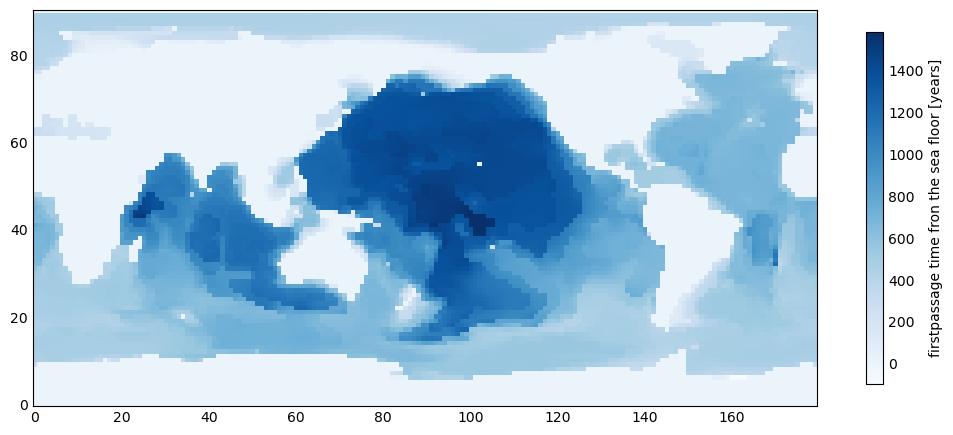

In [15]:
k = np.nonzero(O2d > 0) 
#print(k)
#print(O2d[k])
fpt_sel = np.zeros(O2d.shape)
#print(fpt_sel.shape)
ksel = [k[0],k[1],O2d[k]-1]
fpt_sel[k[0],k[1]] = fpt[k[0],k[1],O2d[k]-1]

plt.style.use('_mpl-gallery-nogrid')

plt.figure(figsize=(10, 6))
plt.imshow(fpt_sel, origin='lower')
cbar = plt.colorbar(label='firstpassage time fron the sea floor [years]',shrink=.6)

plt.show()

The following plots the bathymetry of the ocean along the equator

O2d has shape  (91, 180) and dtype  uint64
(180,)
(181,)


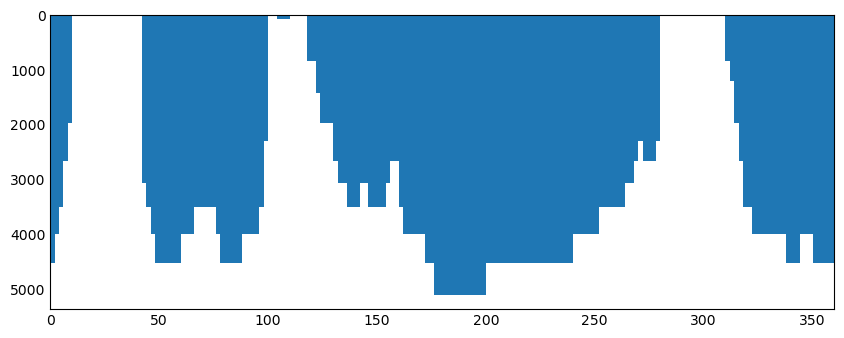

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import StepPatch

O2d = M3d.sum(axis=2)
print('O2d has shape ', O2d.shape, 'and dtype ', O2d.dtype)
h = O2d[45,:]
print(h.shape)
edges = np.insert(xu,0,0)
print(edges.shape)

fig, ax = plt.subplots(figsize=(8, 3))

plt.style.use('_mpl-gallery-nogrid')
#ax.stairs(25-h, edges,  baseline = 25, fill = True)
ax.stairs(zw[h],edges, fill=True)
ax.invert_yaxis()
ax.set_xlim([0, 360])

plt.show()

In [18]:
x = np.arange(10, 1, -1)
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [19]:
zt

array([  18.06755695,   54.76728201,   93.72545169,  137.2005106 ,
        187.45090338,  246.73507463,  317.31146897,  401.43853103,
        501.37470542,  619.37843676,  757.70816968,  918.62234878,
       1104.3794187 , 1317.23782404, 1559.45600943, 1833.29241948,
       2141.00549882, 2484.85369207, 2867.09544383, 3289.98919874,
       3755.79340141, 4266.76649647, 4825.16692852, 5433.25314218])

In [20]:
zt[np.array([3, 3, 1, 8])]

array([137.2005106 , 137.2005106 ,  54.76728201, 501.37470542])

In [21]:
print(zw.shape)
print(h.shape)
print(zw[h].shape)

(24,)
(180,)
(180,)


In [22]:
FPT.shape
fpt = np.transpose(FPT[45,:,:])
fpt.shape
iocn = np.transpose(M3d[45,:,:])

In [23]:
fpt

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.37892612e-01, -7.35670494e-03,  2.25541955e-01, ...,
        -3.44673860e-02,  9.15793475e-02,  7.15810800e-02],
       [ 2.52070481e+00,  1.61924360e+00,  8.97841421e-01, ...,
         4.32737890e+00,  3.36155919e+00,  3.26011140e+00],
       ...,
       [ 6.94880953e+02,  0.00000000e+00,  0.00000000e+00, ...,
         7.13225593e+02,  7.05549378e+02,  6.99081308e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

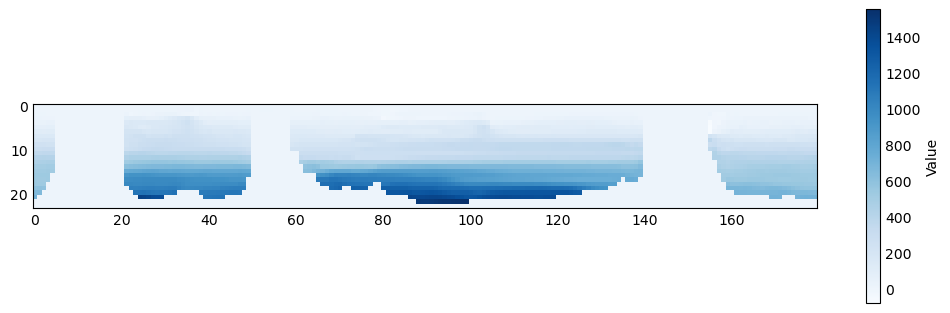

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

plt.figure(figsize=(10, 10))
plt.imshow(fpt, origin='upper')
cbar = plt.colorbar(label='Value',shrink=.3)

plt.show()

latitude : -49.450549450549445


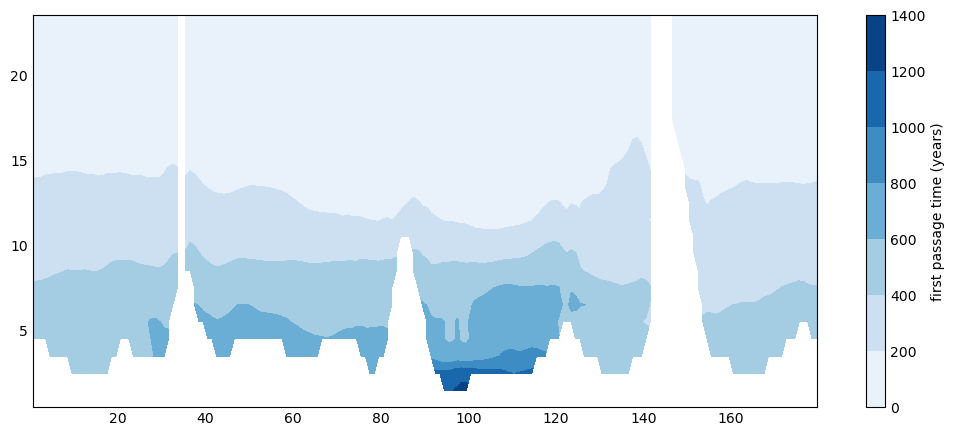

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import masked_where

ilatitude = 20
print('latitude :', yt[ilatitude])

FPT.shape
fpt = np.transpose(FPT[ilatitude,:,:])
fpt.shape
fpt[fpt <0] = 0
iocn = np.transpose(M3d[ilatitude,:,:])

plt.style.use('_mpl-gallery-nogrid')

fpt_masked = masked_where(iocn < 1, fpt)

plt.figure(figsize=(10, 4))
plt.contourf(fpt_masked, origin='upper')
cbar = plt.colorbar(label='first passage time (years)',shrink=1)

plt.show()

In [26]:
fpt_masked

masked_array(
  data=[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.07275547003090052, 0.3608367103338629, 0.0, ...,
         0.006491023243094418, 0.006867313060493279,
         0.011291493289418919],
        [0.11880577516648456, 0.6125203264248689, 0.0, ...,
         0.011829776074104138, 0.012364080572989974,
         0.020803201747919296],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

In [27]:
import random
random.random()

0.13995371899710618

In [28]:
rng = np.random.default_rng()
print(rng.random())
print(type(rng.random()))
print(rng.random((5,2)))

0.1590489889622776
<class 'float'>
[[0.80754052 0.3367613 ]
 [0.0645487  0.41844484]
 [0.95418289 0.85495175]
 [0.18911194 0.40052959]
 [0.92105749 0.40080822]]


Shape of zwo is  (25,) while that for zw is (24,)


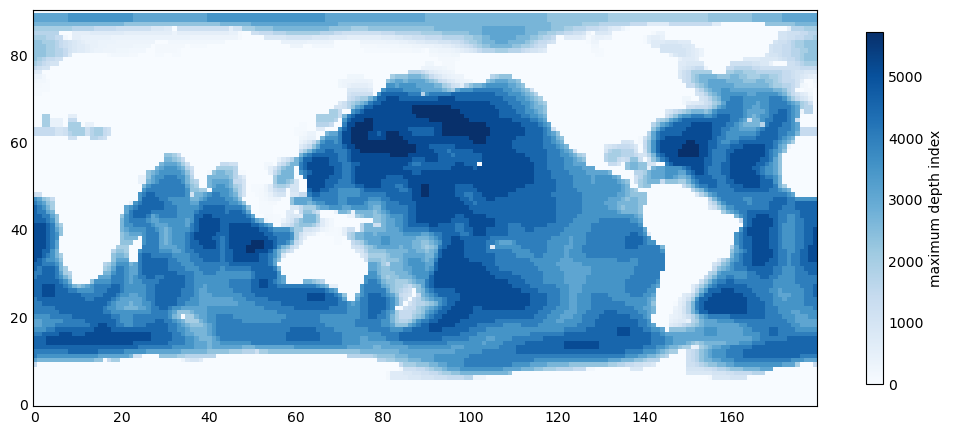

In [44]:
import matplotlib.pyplot as plt
import numpy as np

zwo = np.append(zw,(zw[-1] + dzw[-1]))  # extends depth lebvels all the way to the bottom [0:24]
print('Shape of zwo is ', zwo.shape, 'while that for zw is', zw.shape)
Depth = zwo[O2d]


plt.style.use('_mpl-gallery-nogrid')

plt.figure(figsize=(10, 6))
plt.imshow(Depth, origin='lower')
cbar = plt.colorbar(label='maximum depth index',shrink=.6)

plt.show()

In [53]:
import matplotlib.pyplot as plt
import numpy as np

k = O2d == 1

fpt_bottom = fpt[O2d-1]
print(fpt_bottom.shape)

plt.style.use('_mpl-gallery-nogrid')

plt.figure(figsize=(10, 6))
plt.imshow(fpt_bottom, origin='lower')
cbar = plt.colorbar(label='first passage time [years]',shrink=.6)

plt.show()

IndexError: index 255 is out of bounds for axis 0 with size 91

In [34]:
M3d[20,5,:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0], dtype=uint8)

In [56]:
k = O2d - 1
msk = k > 200
k[msk] = 0
k.shape
k

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [18, 18, 18, ..., 18, 18, 18],
       [18, 18, 18, ..., 18, 18, 18],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [58]:
fpt[k]

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [31]:
print(ofpt.shape)
ofpt[20,10,10,:]

(91, 180, 180, 24)


array([0.00000000e+00, 1.75895418e-02, 4.00946740e-02, 1.24989286e-01,
       1.61033366e+01, 4.78909236e+01, 7.55609027e+01, 9.85257857e+01,
       1.32363536e+02, 1.67260524e+02, 2.12675536e+02, 2.58457371e+02,
       3.10885931e+02, 3.44541726e+02, 3.56905800e+02, 3.98042773e+02,
       4.33578837e+02, 4.67729725e+02, 5.01151986e+02, 5.10174294e+02,
       4.82546537e+02, 4.67996894e+02, 0.00000000e+00, 0.00000000e+00])